In [13]:
import pandas as pd

In [14]:
data_df = pd.read_csv('../res/alcoholism_dataset.csv')
data_df[:5]

,school,gender,age,household size,study time,financial support,activities,internet,significant other,family relationship,free time,social activities,weekday drinker,weekend drinker,health,absences
0,GP,F,18,GT3,2,no,no,no,no,4,3,4,1,1,3,6
1,GP,F,17,GT3,2,yes,no,yes,no,5,3,3,1,1,3,4
2,GP,F,15,LE3,2,no,no,yes,no,4,3,2,2,3,3,10
3,GP,F,15,GT3,3,yes,yes,yes,yes,3,2,2,1,1,5,2
4,GP,F,16,GT3,2,yes,no,no,no,4,3,2,1,2,5,4


### General:
    no = 0
    yes = 1

### school:
    GP = 0
    MS = 1
   
### gender:
    M = 0
    F = 1
    
### houshold size:
    LE3 = 0
    GT3 = 1

In [15]:
# replace these values: ['no', 'yes', 'GP', 'MS', 'LE3', 'GT3', 'M', 'F']
#               with:   [  0,    1,     0,    1,     0,     1,   0,   1]

cleaned_df = data_df.replace(['no', 'yes', 'GP', 'MS', 'LE3', 'GT3', 'M', 'F'], [0, 1, 0, 1, 0, 1, 0, 1])
cleaned_df[:5]

,school,gender,age,household size,study time,financial support,activities,internet,significant other,family relationship,free time,social activities,weekday drinker,weekend drinker,health,absences
0,0,1,18,1,2,0,0,0,0,4,3,4,1,1,3,6
1,0,1,17,1,2,1,0,1,0,5,3,3,1,1,3,4
2,0,1,15,0,2,0,0,1,0,4,3,2,2,3,3,10
3,0,1,15,1,3,1,1,1,1,3,2,2,1,1,5,2
4,0,1,16,1,2,1,0,0,0,4,3,2,1,2,5,4


In [16]:
# Add the values columns 'weekday drinker' and 'weekend drinker'  
# A new column 'drinker' is created to contain the sum of those 2 columns
# 'drinker' = 'weekday drinker' + 'weekend drinker'

cleaned_df['drinker'] = cleaned_df['weekday drinker'] + cleaned_df['weekend drinker']
final_df = cleaned_df.drop(['weekday drinker', 'weekend drinker'], axis=1)
final_df[:5]

,school,gender,age,household size,study time,financial support,activities,internet,significant other,family relationship,free time,social activities,health,absences,drinker
0,0,1,18,1,2,0,0,0,0,4,3,4,3,6,2
1,0,1,17,1,2,1,0,1,0,5,3,3,3,4,2
2,0,1,15,0,2,0,0,1,0,4,3,2,3,10,5
3,0,1,15,1,3,1,1,1,1,3,2,2,5,2,2
4,0,1,16,1,2,1,0,0,0,4,3,2,5,4,3


In [17]:
inputs = ['school', 'gender', 'age', 'household size', 'study time', 'financial support', 'activities', 'internet', 
        'significant other', 'family relationship', 'free time', 'social activities', 'health', 'absences']
output = 'drinker'

y = final_df[output]
X = final_df[inputs]

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [20]:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [21]:
model = DecisionTreeClassifier()
model.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [22]:
X_train_scaled

array([[-0.59947894,  0.88291871,  0.19950597, ..., -0.13845047,
        -0.43809522, -0.08921365],
       [ 1.66811531,  0.88291871,  0.19950597, ..., -0.13845047,
        -0.43809522,  0.56669517],
       [-0.59947894,  0.88291871,  0.19950597, ...,  0.72880329,
        -1.88547311, -0.41716806],
       ...,
       [-0.59947894,  0.88291871, -0.58944945, ..., -0.13845047,
        -0.43809522,  3.35430767],
       [-0.59947894, -1.1326071 , -1.37840488, ..., -0.13845047,
         1.00928266, -0.74512248],
       [-0.59947894, -1.1326071 ,  0.19950597, ..., -1.00570423,
        -1.88547311, -0.41716806]])

In [23]:
predictions = model.predict(X_test_scaled)

In [24]:
predictions

array([ 3,  2,  2,  3,  2,  2,  6,  2,  2,  4,  4,  2,  2, 10,  2,  3,  2,
       10,  4,  4,  4,  4,  2,  2,  2,  6,  2,  5,  3,  4,  5,  2,  8,  2,
        2,  7,  6,  2,  6,  3,  2,  2,  3,  7,  5,  2,  4, 10,  3,  5,  4,
        2,  4,  4,  2,  5,  4,  3,  4,  3,  3,  5,  2,  3,  6,  2,  6,  2,
        3,  2,  4,  2,  3,  2,  4, 10,  2,  4,  2,  2,  2,  2,  3,  2,  4,
        2,  2,  4,  4,  2,  2,  4,  4,  2,  2,  3,  2,  2,  3,  2,  4,  6,
        4,  2,  2,  2,  5,  2,  6,  2,  2,  6,  2,  4,  2,  4,  4,  2,  2,
        4,  2,  3,  2,  2,  4,  2,  3,  2,  5,  4,  5,  3,  8,  2,  4,  2,
        2,  2,  5,  4,  3,  4,  2,  4,  2,  3,  2,  5,  2,  2,  5,  2,  2,
        7,  5,  8,  2,  4,  6,  5,  6,  2,  7,  2,  7,  3,  2,  4,  2,  4,
        7,  3,  4,  5,  3,  8,  2,  2,  7,  4,  2,  2,  3,  2,  2,  3,  2,
        4,  6,  2,  3,  3,  3,  4,  2,  6,  3,  4,  5,  4,  5,  2,  2,  2,
        5,  2,  4,  5,  4,  5,  3,  8,  2,  4,  2,  4,  4,  2,  2,  3,  2,
        4,  5,  6,  4,  2

In [25]:
acc_score = accuracy_score(y_test, predictions) 
acc_score

0.5057471264367817

In [27]:
conf_mat = confusion_matrix(y_test, predictions)
conf_mat

array([[63, 17, 13,  5,  3,  1,  0,  0],
       [16, 16, 10,  5,  2,  0,  0,  0],
       [ 9,  0, 27,  2,  0,  2,  0,  0],
       [ 8,  0,  1, 10,  1,  2,  0,  1],
       [ 8,  1,  0,  2,  7,  1,  0,  0],
       [ 1,  0,  4,  1,  0,  3,  1,  0],
       [ 2,  1,  1,  1,  0,  0,  3,  0],
       [ 1,  0,  1,  1,  2,  0,  2,  3]], dtype=int64)

In [28]:
pd.DataFrame(data=conf_mat)

,0,1,2,3,4,5,6,7
0,63,17,13,5,3,1,0,0
1,16,16,10,5,2,0,0,0
2,9,0,27,2,0,2,0,0
3,8,0,1,10,1,2,0,1
4,8,1,0,2,7,1,0,0
5,1,0,4,1,0,3,1,0
6,2,1,1,1,0,0,3,0
7,1,0,1,1,2,0,2,3


In [33]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           2       0.58      0.62      0.60       102
           3       0.46      0.33      0.38        49
           4       0.47      0.68      0.56        40
           5       0.37      0.43      0.40        23
           6       0.47      0.37      0.41        19
           7       0.33      0.30      0.32        10
           8       0.50      0.38      0.43         8
          10       0.75      0.30      0.43        10

    accuracy                           0.51       261
   macro avg       0.49      0.42      0.44       261
weighted avg       0.51      0.51      0.50       261



In [34]:
import matplotlib.pyplot as plt

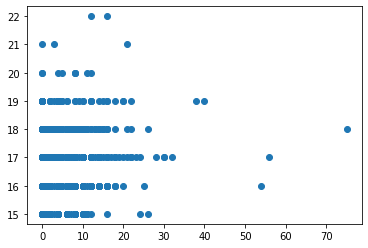

In [38]:
plt.scatter(final_df['absences'], final_df['age'])
plt.show()

### The dataset doesn't have a normal distribution, from 

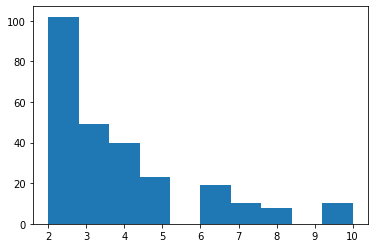

In [41]:
plt.hist(y_test)
plt.show()